In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import statsmodels.api as sm

In [290]:
df = pd.read_csv("/data/anonymousdata.csv")
type_dict = {"month":int, "AR":str, "Customer":str, "Truck":str, "Driver":str, "Hours":float, "start_time":"datetime64[m]", "end_time":"datetime64[m]", "gps_start":"datetime64[m]", "gps_end":"datetime64[m]", "Overlap":int, "start_time_difference":int, "end_time_difference":int, "deviation_from_hours":int, "Owner/Operator":str, "Action Taken":bool}
df = df.astype(type_dict)
df2 = df[df["deviation_from_hours"] <= -45]

In [291]:
df.describe()

,month,Hours,Overlap,start_time_difference,end_time_difference,deviation_from_hours
count,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000
mean,4.001859,10.143736,0.051487,17.221253,-26.241419,-43.462672
std,1.965842,4.155805,0.221006,51.322789,60.400762,85.126189
min,1.000000,1.000000,0.000000,-1430.000000,-1430.000000,-1447.000000
25%,2.000000,7.000000,0.000000,-3.000000,-38.000000,-58.000000
50%,4.000000,11.000000,0.000000,12.000000,-16.000000,-27.000000
75%,6.000000,13.500000,0.000000,26.000000,2.000000,-5.000000
max,7.000000,44.000000,1.000000,1431.000000,163.000000,1410.000000


In [292]:
df[["Overlap"]].sum()

Overlap    360
dtype: int64

In [293]:
df[["month","deviation_from_hours"]].groupby("month").mean()

,deviation_from_hours
month,
1,-38.784449
2,-54.636058
3,-57.208738
4,-68.492972
5,-42.488330
6,-20.265478
7,-22.368301


In [294]:
df2.describe()

,month,Hours,Overlap,start_time_difference,end_time_difference,deviation_from_hours
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,3.428450,11.595047,0.019052,44.680356,-66.476291,-111.156647
std,1.635379,3.733947,0.136736,69.696315,87.209566,111.847108
min,1.000000,1.500000,0.000000,-61.000000,-1430.000000,-1447.000000
25%,2.000000,9.000000,0.000000,17.000000,-74.000000,-114.000000
50%,3.000000,13.000000,0.000000,31.000000,-47.000000,-77.000000
75%,5.000000,14.000000,0.000000,50.000000,-30.000000,-57.000000
max,7.000000,44.000000,1.000000,1431.000000,133.000000,-45.000000


In [64]:
flagvtotaldf = df[["month","Hours"]].groupby("month").count().join(df2[["month","Hours"]].groupby("month").count(), on="month", rsuffix="_x").rename(columns={"Hours":"Total Count", "Hours_x":"Flagged Count"})
flagvtotaldf["Good Count"] = flagvtotaldf["Total Count"]-flagvtotaldf["Flagged Count"]
flagvtotaldf

,Total Count,Flagged Count,Good Count
month,,,
1,1016,377,639
2,893,356,537
3,1030,471,559
4,996,519,477
5,1114,406,708
6,1066,141,925
7,877,92,785


In [224]:
df["flagged"] = df[["deviation_from_hours"]].mask(df["deviation_from_hours"] < -45, 0).mask(df["deviation_from_hours"] >= -45,1)
df.head()

,month,AR,Customer,Truck,Driver,Hours,start_time,end_time,gps_start,gps_end,Overlap,start_time_difference,end_time_difference,deviation_from_hours,Owner/Operator,Action Taken,flagged
0,1,1,C-41,T-33,D-19,11.0,2023-01-01 05:00:00,2023-01-01 16:00:00,2023-01-01 05:38:00,2023-01-01 15:24:00,0,38,-36,-74,Barrett,False,0
1,1,2,C-41,T-45,D-71,7.0,2023-01-01 05:00:00,2023-01-01 12:00:00,2023-01-01 05:58:00,2023-01-01 11:54:00,0,58,-6,-64,Barrett,False,0
2,1,3,C-23,T-45,D-71,4.0,2023-01-01 12:00:00,2023-01-01 16:00:00,2023-01-01 11:46:00,2023-01-01 16:20:00,0,-14,20,34,Barrett,False,1
3,1,4,C-23,T-34,D-40,10.0,2023-01-01 07:00:00,2023-01-01 17:00:00,2023-01-01 07:21:00,2023-01-01 16:23:00,0,21,-37,-58,Barrett,False,0
4,1,5,C-23,T-30,D-57,7.5,2023-01-01 17:00:00,2023-01-02 00:30:00,2023-01-01 17:14:00,2023-01-01 23:50:00,0,14,-40,-54,Barrett,False,0


In [19]:
%matplotlib inline

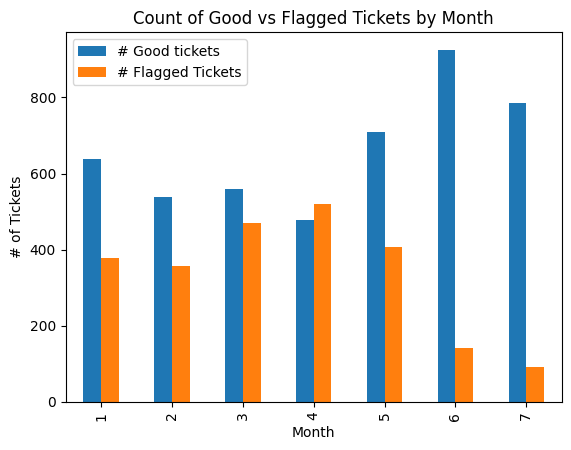

In [70]:
plot1 = flagvtotaldf[["Good Count", "Flagged Count"]].plot.bar(title="Count of Good vs Flagged Tickets by Month")
plot1.set_xlabel("Month")
plot1.set_ylabel("# of Tickets")
plot1.legend(labels=["# Good tickets", "# Flagged Tickets"])
plt.show()

In [67]:
plt.clf()

<Figure size 640x480 with 0 Axes>

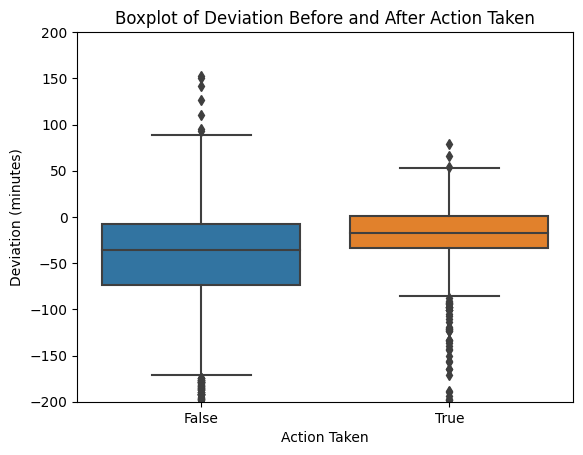

In [88]:
sns.boxplot(data=df, y="deviation_from_hours", x="Action Taken") 
plt.title("Boxplot of Deviation Before and After Action Taken") 
plt.xlabel("Action Taken") 
plt.ylabel("Deviation (minutes)")
plt.axis([-.5,1.5,-200,200])
plt.show()

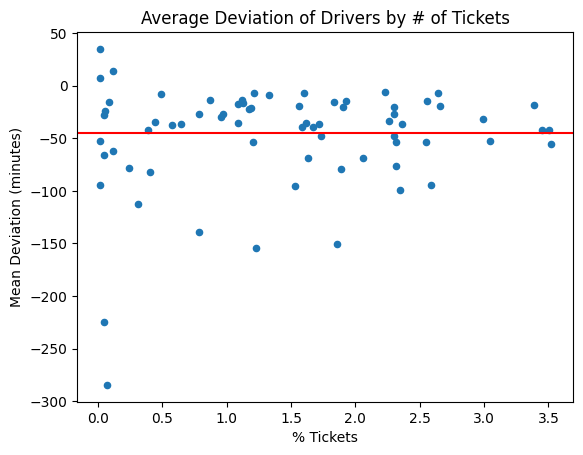

In [110]:
plot2 = df[["Driver", "deviation_from_hours"]].groupby("Driver").mean().join(df[["Driver","Hours"]].groupby("Driver").count()/69.92, on="Driver").rename(columns={"Hours":"% Tickets"}).sort_values("deviation_from_hours").plot.scatter(x="% Tickets", y="deviation_from_hours")
plt.axhline(y=-45,color="red")
plt.ylabel("Mean Deviation (minutes)")
plt.title("Average Deviation of Drivers by # of Tickets")
plt.show()

In [144]:
driverstat = df[["Driver", "deviation_from_hours"]].groupby("Driver").mean().join(df[["Driver","Hours"]].groupby("Driver").count(), on="Driver").rename(columns={"Hours":"# Tickets"}).join(df[["Driver","Overlap"]].groupby("Driver").sum(), on="Driver").sort_values("# Tickets", ascending=False)
driverstat[driverstat["deviation_from_hours"] < -45]

,deviation_from_hours,# Tickets,Overlap
Driver,,,
D-51,-55.577236,246,4
D-11,-52.816901,213,2
D-45,-94.027624,181,1
D-41,-53.764045,178,2
D-66,-99.573171,164,9
D-22,-76.734568,162,0
D-4,-53.271605,162,0
D-59,-47.788820,161,0
D-27,-69.090278,144,0


<Figure size 640x480 with 0 Axes>

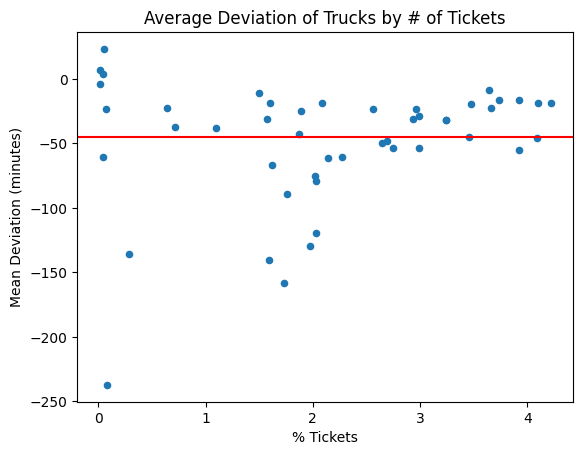

In [116]:
plt.clf()
plot3 = df[["Truck", "deviation_from_hours"]].groupby("Truck").mean().join(df[["Truck","Hours"]].groupby("Truck").count()/69.92, on="Truck").rename(columns={"Hours":"% Tickets"}).sort_values("deviation_from_hours").plot.scatter(x="% Tickets", y="deviation_from_hours")
plt.axhline(y=-45,color="red")
plt.ylabel("Mean Deviation (minutes)")
plt.title("Average Deviation of Trucks by # of Tickets")
plt.show()

In [118]:
truckstat = df[["Truck", "deviation_from_hours"]].groupby("Truck").mean().join(df[["Truck","Hours"]].groupby("Truck").count(), on="Truck").rename(columns={"Hours":"# Tickets"}).sort_values("# Tickets", ascending=False)
truckstat[truckstat["deviation_from_hours"] < -45]

,deviation_from_hours,# Tickets
Truck,,
T-10,-45.573427,286
T-46,-55.456204,274
T-38,-45.111570,242
T-35,-53.421053,209
T-8,-53.604167,192
T-18,-47.946809,188
T-25,-49.675676,185
T-4,-60.496855,159
T-28,-60.953333,150


In [139]:
ownerstat = df[["Owner/Operator", "deviation_from_hours"]].groupby("Owner/Operator").mean().join(df[["Owner/Operator","Hours"]].groupby("Owner/Operator").count(), on="Owner/Operator").rename(columns={"Hours":"# Tickets"}).sort_values("# Tickets", ascending=False)
ownerstat

,deviation_from_hours,# Tickets
Owner/Operator,,
Barrett,-40.766144,4212
Gilmour,-60.473684,1178
Mason,-36.310089,674
Waters,-41.822581,496
Wright,-36.409722,432


In [203]:
truck_pivot = df.pivot_table(values="deviation_from_hours", index=["Owner/Operator","Truck"], columns="month", aggfunc="mean", fill_value=np.nan, margins=True)
truck_pivot

month                          1           2           3           4  \
Owner/Operator Truck                                                   
Barrett        T-1     -4.000000         NaN         NaN         NaN   
               T-11   -39.750000         NaN -125.800000 -672.000000   
               T-12          NaN         NaN         NaN  -53.000000   
               T-13   -14.547619   -9.133333  -25.722222  -26.833333   
               T-14   -20.925000  -56.027778  -71.000000         NaN   
               T-15   -25.952381   -7.176471  -20.555556  -30.318182   
               T-16   -72.941176  -38.894737  -33.318182  -25.272727   
               T-17          NaN   -2.310345  -14.674419  -19.152174   
               T-18   -54.512195  -30.690476  -94.568182 -347.000000   
               T-2      4.000000         NaN         NaN         NaN   
               T-21          NaN         NaN         NaN  -27.250000   
               T-22          NaN         NaN  -77.000000         NaN   
               T-23          NaN    7.000000         NaN         NaN   
               T-24  -133.500000  -50.000000  -13.315789   -7.750000   
               T-26   -57.666667  -90.227273  -21.421053  -11.333333   
               T-29   -38.666667  -55.238095  -19.341463  -49.861111   
               T-3    -79.187500  -95.828571 -141.384615 -159.411765   
               T-30   -19.100000  -11.514286  -23.725000  -17.021277   
               T-31   -20.150000   -7.026316  -23.394737  -27.666667   
               T-32    -5.222222  -28.500000         NaN   -7.500000   
               T-33   -17.864865  -14.405405  -19.408163   -9.408163   
               T-34   -24.976190  -23.843750  -44.000000  -39.718750   
               T-36   -43.500000  -28.666667  -35.296296  -38.105263   
               T-37    -6.820513         NaN         NaN  -42.531250   
               T-39   -17.423077  -21.444444  -21.475000  -13.837209   
               T-40   -17.615385   -8.608696   -5.886364   -7.653846   
               T-41   -77.600000 -110.320000 -129.225000 -203.060606   
               T-42          NaN         NaN         NaN -237.166667   
               T-43    26.000000         NaN   20.000000         NaN   
               T-44   -86.818182 -174.647059 -136.294118 -215.500000   
               T-45   -53.775000 -198.515152 -114.628571 -172.500000   
               T-9     -3.088235  -22.636364  -10.000000  -38.419355   
Gilmour        T-25   -40.240000  -55.678571  -61.875000  -65.407407   
               T-28   -59.906250         NaN  -82.419355 -101.173913   
               T-35   -57.000000  -61.384615  -89.580645  -78.941176   
               T-4    -76.233333  -94.647059  -92.818182  -99.850000   
               T-47   -69.592593  -79.500000  -87.750000 -136.354839   
               T-6   -119.214286  -83.923077  -87.750000  -78.700000   
               T-8    -57.764706  -51.083333  -71.266667  -86.413793   
Mason          T-20   -27.431818  -28.657143  -42.911765  -61.032258   
               T-38   -24.069767  -45.902439  -40.542857  -48.419355   
               T-7    -31.657143  -77.942857 -252.000000  -44.619048   
Waters         T-19          NaN         NaN         NaN  -72.777778   
               T-46   -49.871795  -65.297297  -74.170732 -114.000000   
               T-5           NaN         NaN         NaN  -48.000000   
Wright         T-10   -42.829268  -42.264706  -73.666667  -80.210526   
               T-27          NaN         NaN         NaN  -52.363636   
All                   -38.784449  -54.636058  -57.208738  -68.492972   

month                          5          6           7         All  
Owner/Operator Truck                                                 
Barrett        T-1           NaN        NaN         NaN   -4.000000  
               T-11          NaN        NaN         NaN -135.900000  
               T-12    10.000000 -24.333333         NaN  -23.200000  
               T-13   -31.466667 -27.500000  -14.

In [207]:
driver_pivot = df.pivot_table(values="deviation_from_hours", index="Driver", columns="month", aggfunc="mean", fill_value=np.nan, margins=True)
driver_pivot

month,1,2,3,4,5,6,7,All
Driver,,,,,,,,
D-1,-76.714286,-91.392857,-93.526316,-99.423077,-45.200000,-53.000000,NaN,-79.378788
D-10,NaN,-112.500000,-135.894737,-215.884615,NaN,NaN,NaN,-154.093023
D-11,-58.642857,-55.764706,-69.121212,-86.576923,-60.411765,-23.153846,-16.375000,-52.816901
D-12,-58.000000,-341.250000,NaN,NaN,NaN,NaN,NaN,-284.600000
D-13,NaN,-45.000000,-35.240000,-37.500000,-254.642857,-62.956522,-30.833333,-68.807018
...,...,...,...,...,...,...,...,...
D-70,-28.878049,-28.218750,-42.375000,-57.800000,-26.969697,-15.291667,-12.764706,-31.822967
D-71,-53.878788,NaN,-118.272727,-169.064516,NaN,NaN,-26.809524,-95.177570
D-8,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


In [444]:
transformed = (df[abs(df["deviation_from_hours"]) < 200]["deviation_from_hours"])

In [445]:
print(stats.kurtosis(transformed))
print(stats.skew(transformed))
print(transformed.mean())


1.3953381142756722
-0.893031105060333
-32.64985952979447


In [480]:
x = np.random.normal(loc=-32,scale=50,size=4000)

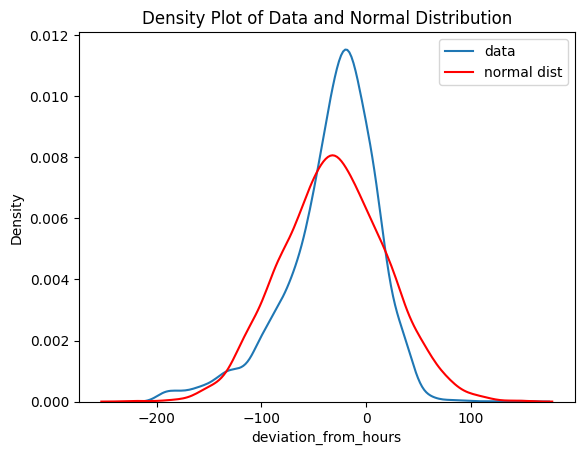

In [481]:
# transformed.plot.hist(bins=500)
sns.kdeplot(transformed, label="data")
sns.kdeplot(x, color="red", label="normal dist")
plt.legend(["data","normal dist"])
plt.title("Density Plot of Data and Normal Distribution")
# plt.savefig("C:\\users\\lukem\\py\\azure\\work\\imgs\\densityplotnormal.png", bbox_inches="tight")
plt.show()

In [1]:
# stats.kstest(transformed,cdf=stats.norm.cdf)
# stats.shapiro(transformed)
# stats.anderson(transformed)
# Data looks Gaussian? High kurtosis, skewness ~ -4 `

In [466]:
# for driver analysis, remove drivers that drove 20 or less times over the 4.5 months before action
con_driver = df[["Driver", "deviation_from_hours"]][df["Action Taken"] == False].groupby("Driver").count().sort_values("deviation_from_hours")
droplist = con_driver[con_driver["deviation_from_hours"] <= 20]
a2 = df[["Driver", "deviation_from_hours"]][df["Action Taken"] == False]
b2 = df[["Driver", "deviation_from_hours"]][df["Action Taken"] == True]
# set(b2["Driver"]) - set(a2["Driver"])
for x in droplist.index:
    a2 = a2.mask(a2["Driver"] == x, np.nan)
a2 = a2.dropna(axis=0, subset="Driver")

In [260]:
a2.groupby("Driver").count().rename(columns={"deviation_from_hours":"count"}).join(a2.groupby("Driver").mean().rename(columns={"deviation_from_hours":"mean"}), on="Driver").join(a2.groupby("Driver").var().rename(columns={"deviation_from_hours":"var"}), on="Driver")

,count,mean,var
Driver,,,
D-1,113,-88.486726,1503.555626
D-10,86,-154.093023,12075.379480
D-11,140,-68.500000,3120.266187
D-13,65,-68.123077,16903.797115
D-15,78,-13.474359,2249.888944
D-16,143,-15.825175,761.103024
D-17,105,-36.857143,7272.969780
D-18,108,-6.861111,434.774922
D-19,40,-37.200000,2995.343590


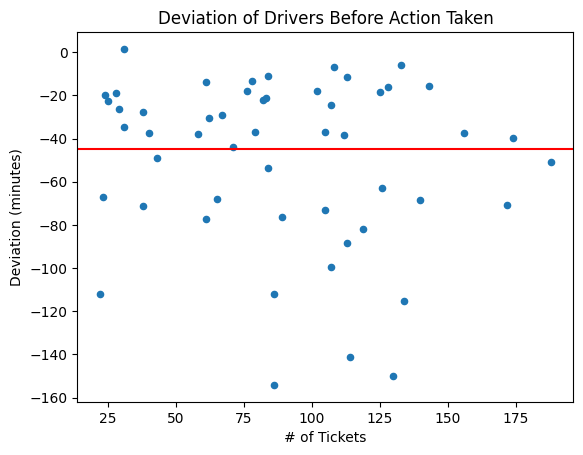

In [478]:
a2.groupby("Driver").count().rename(columns={"deviation_from_hours":"count"}).join(a2.groupby("Driver").mean().rename(columns={"deviation_from_hours":"mean"}), on="Driver").plot.scatter(x="count",y="mean")
plt.axhline(y=-45, color="red")
plt.xlabel("# of Tickets")
plt.ylabel("Deviation (minutes)")
plt.title("Deviation of Drivers Before Action Taken")
plt.show()

In [484]:
b = df[(abs(df["deviation_from_hours"]) < 200) & (df["Action Taken"] == True)]["deviation_from_hours"]
a = df[(abs(df["deviation_from_hours"]) < 200) & (df["Action Taken"] == False)]["deviation_from_hours"]
b1 = df[(df["Action Taken"] == True)]["deviation_from_hours"]
a1 = df[(df["Action Taken"] == False)]["deviation_from_hours"]
print(a.mean(),b.mean(),"\n",a1.mean(),b1.mean())

-40.26507650765077 -18.05648986632169 
 -53.62944600129338 -23.418614534636635


In [488]:
# Data not paired, different sizes/variances -> Welch's ttest
stats.ttest_ind(a,b,equal_var=False,alternative="less")
# p ~ 1x10^-117, average of stuff after action is higher

Ttest_indResult(statistic=-23.45434333222296, pvalue=3.6981339555589854e-117)